<a href="https://colab.research.google.com/github/puff-tw/1017/blob/main/1017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LATEX Math**

$ Area = \frac{1}{2} \pi r 2 $

資料 input <----> output

1. 選擇題: cat/dog ， 梵谷/莫內
  * 分類 Classification
2. 計算題: 氣溫、房價
  * 迴歸 Regression
3. 無標註選擇題
  * 依照 input 相似度分成數群
  * 分群 cluster

----

本機請安裝 [scikit-learn](https://scikit-learn.org/stable/install.html)

編輯器 [PyCharm IDE](https://www.jetbrains.com/pycharm/) 

套件管理 [miniforge](https://zhuanlan.zhihu.com/p/518926990)

cross-platform package manager

[Mamba](https://mamba.readthedocs.io/en/latest/installation.html)

https://github.com/mamba-org/mamba

[2022「GO NEXT DIGITAL擬世大人物」數位科技解決方案競賽
](https://news.idea-show.com/post/2022%e3%80%8cgo-next-digital%e6%93%ac%e4%b8%96%e5%a4%a7%e4%ba%ba%e7%89%a9%e3%80%8d%e6%95%b8%e4%bd%8d%e7%a7%91%e6%8a%80%e8%a7%a3%e6%b1%ba%e6%96%b9%e6%a1%88%e7%ab%b6%e8%b3%bd/?fbclid=IwAR1tDmSY94td9Z8kYg22nNl6M26vdrmtcJsF80vCraQS1wwDdhx0dgUqT2U)





下載安裝pycharm 時，目前最好是安裝2022.2.2 版本，
因為最新的 2022.2.3 在繁體中文的 windows 上似乎會有問題 

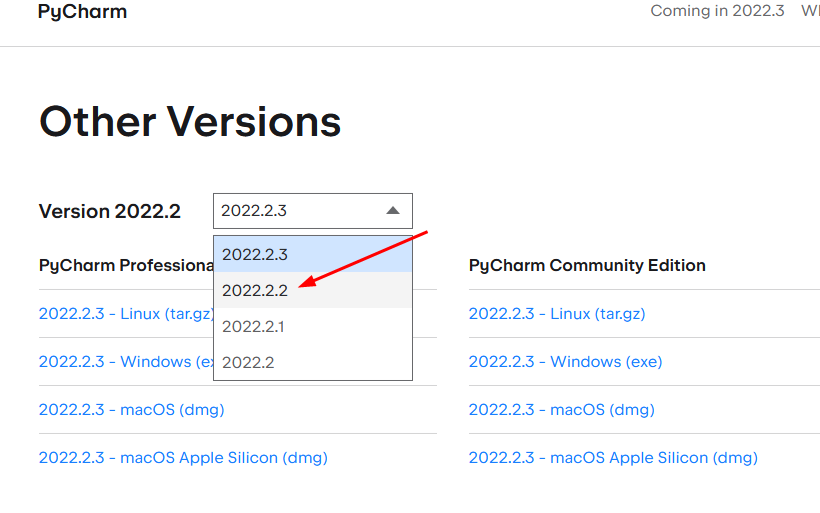

In [45]:
# classification
# 資料集
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# load_iris(*[, return_X_y, as_frame]) 加載並返回 iris 鳶尾花 數據集（分類 classification）。

# Iris-Setosa 山鳶尾
# Iris-Versicolour 變色鳶尾
# Iris-Virginica 維吉尼亞鳶尾

# 統計需要資料量:
# ML: 1k以上  DL: 1w以上
# 資料量多寡 -> 問題難度 (大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
# 處理資料: pandas -> DataFrame
# 進到sklearn: numpy -> array
# 驗證模型一定要拿沒看過的
import numpy as np
from sklearn.model_selection import train_test_split
# 之後的題目都命名叫 x
# x 輸入 y 輸出
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10% y]
# 10%資料是拿來驗證模型，不是驗證資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)


In [47]:
train_test_split(
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
     test_size=0.25)

[[3, 2, 4], [1], [7, 6, 8], [5], [11, 10, 12], [9]]

In [48]:
# axis 參數很重要 雙向功能 0 = 橫的  1 = 直的
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# pandas.DataFrame.drop
# d = pandas.DataFrame([[1,2],[3,4]], col )
# axis!!!!
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])
d.drop("a", axis=1)

,b
a,2
b,4


In [49]:
from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# 目測長兩層就好
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

# 訓練完成

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [43, 46, 46]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 92\nvalue = [0, 46, 46]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 42, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.15\nsamples = 49\nvalue = [0, 4, 45]\nclass = virginica')]

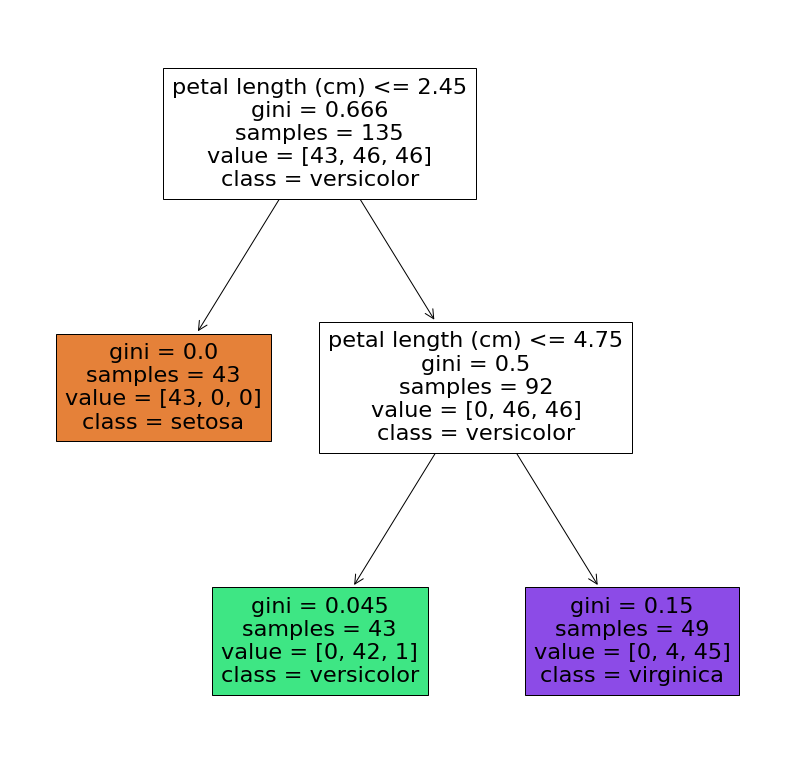

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf,
          feature_names=iris["feature_names"],
          filled=True,
          class_names=iris["target_names"]
          )

* Gini = 猜錯的機率
* gini 66% 猜錯的機率
* gini 0%  就是信心程度100%
* 決策點 Gini 降到最低 0 才停
* 工程師 ６０ 非工程師 40
* 0.6 * 0.4 + 0.6 * 0.4 --> 0.48  有48%是猜錯的

決策點
1. 信心程度提高 - 提高至最高的分割點

* Gini 系數 p1 (1-p1 ) + p2 (1-p2) ....
* 43 和 5 = 0.187


In [51]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)
# 1.0 = 100% 猜對機率

0.8666666666666667

In [52]:
y_test

array([0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1])

In [53]:
pre

array([0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1])

**統計的金玉良言 : 千萬不要完美訓練 "過擬合"**
* 不要把資料吃到100%
* 參數就是拿來避免"過擬合" overfitting
* 太過稀少的樣本例外就忽略就好
* 以大方向為主就好

**方法 : 剪枝**
* 前剪枝 預先條件，讓它不要長。 (設置參數)
* 後剪枝 決策樹全長到底，再來剪 (比較好，但費時)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

影響效果最大的參數 max_depth 最大深度
